In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mtlb
mtlb.rcParams["figure.figsize"] = (20,10)

In [67]:
df = pd.read_csv("/content/drive/MyDrive/Research/ML/Others Data/Dhaka_House_Data.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,Ready To Move,Golshan,10 Bedroom,NaN,7150,13.0,NaN,3600.0
1,Super built-up Area,18-Jan,Banani,4 BHK,NaN,8321,5.0,2.0,2912.0
2,Plot Area,Ready To Move,Golshan,6 Bedroom,NaN,8000,6.0,3.0,2800.0
3,Plot Area,Ready To Move,Dhanmondi,5 Bedroom,NaN,9600,7.0,2.0,2736.0
4,Super built-up Area,Ready To Move,Banani,5 BHK,Kierser,8321,5.0,3.0,2700.0


In [68]:
df.shape

(13320, 9)

In [69]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [70]:
df= df.drop(['area_type', 'availability', 'society'], axis= 'columns')
df

,location,size,total_sqft,bath,balcony,price
0,Golshan,10 Bedroom,7150,13.0,NaN,3600.00
1,Banani,4 BHK,8321,5.0,2.0,2912.00
2,Golshan,6 Bedroom,8000,6.0,3.0,2800.00
3,Dhanmondi,5 Bedroom,9600,7.0,2.0,2736.00
4,Banani,5 BHK,8321,5.0,3.0,2700.00
...,...,...,...,...,...,...
13315,Attibele,1 BHK,410,1.0,1.0,10.00
13316,Chandapura,1 BHK,410,1.0,1.0,10.00
13317,Chandapura,1 BHK,450,1.0,1.0,9.00
13318,Hosur Road,NaN,1350,NaN,NaN,8.44


In [71]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [72]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [73]:
df['size'].unique()

array(['4 BHK', '6 Bedroom', '5 Bedroom', '5 BHK', '4 Bedroom', '7 BHK',
       '3 Bedroom', '9 Bedroom', '3 BHK', '6 BHK', '7 Bedroom',
       '8 Bedroom', '1 BHK', '43 Bedroom', '2 Bedroom', '2 BHK',
       '10 Bedroom', '11 BHK', '8 BHK', '1 Bedroom', '12 Bedroom',
       '9 BHK', '13 BHK', '27 BHK', '11 Bedroom', '14 BHK', '1 RK'],
      dtype=object)

In [74]:
df['Bhk'] = df['size'].apply(lambda x: int(x.split(" ")[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df['Bhk'].unique()

array([ 4,  6,  5,  7,  3,  9,  8,  1, 43,  2, 10, 11, 12, 13, 27, 14])

In [76]:
df.head()

,location,size,total_sqft,bath,balcony,price,Bhk
1,Banani,4 BHK,8321,5.0,2.0,2912.0,4
2,Golshan,6 Bedroom,8000,6.0,3.0,2800.0,6
3,Dhanmondi,5 Bedroom,9600,7.0,2.0,2736.0,5
4,Banani,5 BHK,8321,5.0,3.0,2700.0,5
7,New Market,4 Bedroom,10624,4.0,2.0,2340.0,4


In [77]:
df= df.drop(['size'], axis= 'columns')
df

,location,total_sqft,bath,balcony,price,Bhk
1,Banani,8321,5.0,2.0,2912.0,4
2,Golshan,8000,6.0,3.0,2800.0,6
3,Dhanmondi,9600,7.0,2.0,2736.0,5
4,Banani,8321,5.0,3.0,2700.0,5
7,New Market,10624,4.0,2.0,2340.0,4
...,...,...,...,...,...,...
13314,Alur,470,2.0,1.0,10.0,1
13315,Attibele,410,1.0,1.0,10.0,1
13316,Chandapura,410,1.0,1.0,10.0,1
13317,Chandapura,450,1.0,1.0,9.0,1


In [78]:
df[df.Bhk>20]

,location,total_sqft,bath,balcony,price,Bhk
131,Munnekollal,2400,40.0,0.0,660.0,43
1231,2Electronic City Phase II,8000,27.0,0.0,230.0,27


In [79]:
df.total_sqft.unique()

array(['8321', '8000', '9600', ..., '340', '167Sq. Meter', '284'],
      dtype=object)

In [80]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [81]:
df[~df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,Bhk
204,5 Bedroom Farm House in Lakshmipura,24Guntha,6.0,2.0,550.000,5
277,Hebbal,3067 - 8156,4.0,0.0,477.000,4
330,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4
409,Judicial Layout,45Sq. Yards,6.0,3.0,400.000,5
442,Devanahalli,4900 - 4940,4.0,0.0,393.500,4
...,...,...,...,...,...,...
13204,Sarjapur Road,580 - 650,1.0,0.0,17.835,1
13205,Sarjapur,633 - 666,1.0,0.0,17.535,1
13254,Chandapura,520 - 645,1.0,0.0,15.135,1
13290,Varthur Road,540 - 565,1.0,0.0,13.260,1


In [82]:
def sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [83]:
sqft_to_num('89-58')

73.5

In [84]:
df['total_sqft'] = df['total_sqft'].apply(sqft_to_num)
df

,location,total_sqft,bath,balcony,price,Bhk
1,Banani,8321.0,5.0,2.0,2912.0,4
2,Golshan,8000.0,6.0,3.0,2800.0,6
3,Dhanmondi,9600.0,7.0,2.0,2736.0,5
4,Banani,8321.0,5.0,3.0,2700.0,5
7,New Market,10624.0,4.0,2.0,2340.0,4
...,...,...,...,...,...,...
13314,Alur,470.0,2.0,1.0,10.0,1
13315,Attibele,410.0,1.0,1.0,10.0,1
13316,Chandapura,410.0,1.0,1.0,10.0,1
13317,Chandapura,450.0,1.0,1.0,9.0,1


In [85]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,total_sqft,bath,balcony,price,Bhk,price_per_sqft
1,Banani,8321.0,5.0,2.0,2912.0,4,34995.793775
2,Golshan,8000.0,6.0,3.0,2800.0,6,35000.000000
3,Dhanmondi,9600.0,7.0,2.0,2736.0,5,28500.000000
4,Banani,8321.0,5.0,3.0,2700.0,5,32448.023074
7,New Market,10624.0,4.0,2.0,2340.0,4,22025.602410


In [86]:
len(df.location.unique())

1263

In [87]:
df.location = df.location.apply(lambda x: x.strip())

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Shat Rasta               515
Sarjapur  Road           372
Electronic City          302
Kanakpura Road           261
Thanisandra              234
                        ... 
Kanakapura Main Road       1
Kanakapura Road            1
Kanakapura Road,           1
Kanakapura main  Road      1
whitefiled                 1
Name: location, Length: 1252, dtype: int64

In [88]:
len(location_stats[location_stats<=10])

1015

In [89]:
location_stat_lessThen10 = location_stats[location_stats<=10]
location_stat_lessThen10

location
Ganga Nagar              10
Kalkere                  10
Dairy Circle             10
Kodigehalli              10
Nagappa Reddy Layout     10
                         ..
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
Kanakapura main  Road     1
whitefiled                1
Name: location, Length: 1015, dtype: int64

In [90]:
len(df.location.unique())

1252

In [91]:
df.location = df.location.apply(lambda x: "other" if x in location_stat_lessThen10 else x)
len(df.location.unique())

238

In [92]:
df[df.total_sqft/df.Bhk<300].head()

,location,total_sqft,bath,balcony,price,Bhk,price_per_sqft
131,Munnekollal,2400.0,40.0,0.0,660.0,43,27500.000000
143,Basavangudi,1754.0,6.0,2.0,650.0,6,37058.152794
461,KR Puram,1500.0,7.0,2.0,382.0,8,25466.666667
510,JP Nagar,2550.0,9.0,0.0,360.0,9,14117.647059
541,Banashankari Stage III,1200.0,7.0,2.0,350.0,8,29166.666667


In [93]:
df.shape

(12710, 7)

In [94]:
df = df[~(df.total_sqft/df.Bhk<300)]
df.shape

(12055, 7)

In [95]:
df.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [96]:
def remove_price_per_sqft_outlairs(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    mean = np.mean(subdf.price_per_sqft)
    std = np.std(subdf.price_per_sqft)
    reduce_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<= (mean+std))]
    df_out = pd.concat([df_out,reduce_df], ignore_index = True)
  return df_out

In [97]:
df = remove_price_per_sqft_outlairs(df)
df.shape

(9848, 7)

In [98]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.Bhk==2)]
    bhk3 = df[(df.location==location) & (df.Bhk==3)]
    mtlb.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

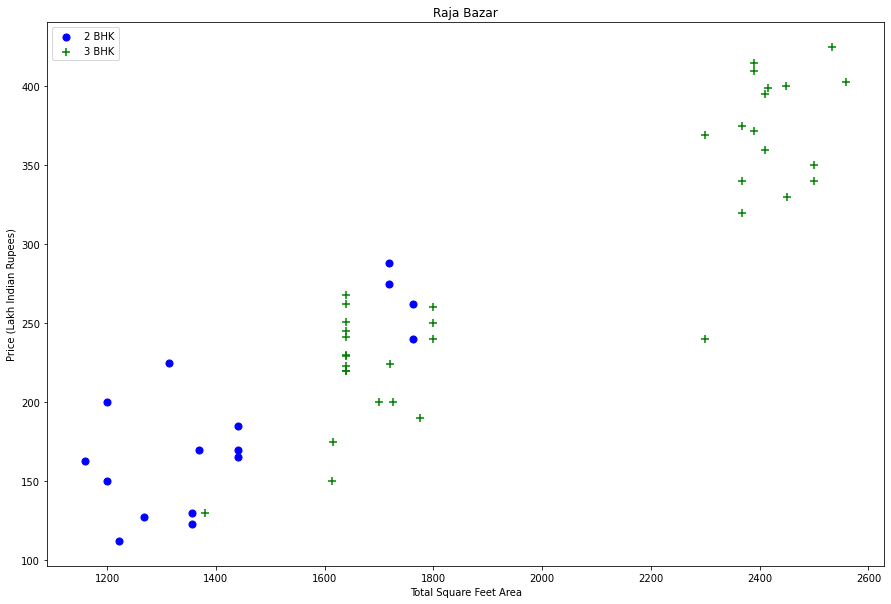

In [99]:
plot_scatter_chart(df,"Raja Bazar")

In [100]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for Bhk, Bhk_df in location_df.groupby('Bhk'):
            bhk_stats[Bhk] = {
                'mean': np.mean(Bhk_df.price_per_sqft),
                'std': np.std(Bhk_df.price_per_sqft),
                'count': Bhk_df.shape[0]
            }
        for Bhk, Bhk_df in location_df.groupby('Bhk'):
            stats = bhk_stats.get(Bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, Bhk_df[Bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [101]:
df = remove_bhk_outliers(df)
df.shape

(7025, 7)

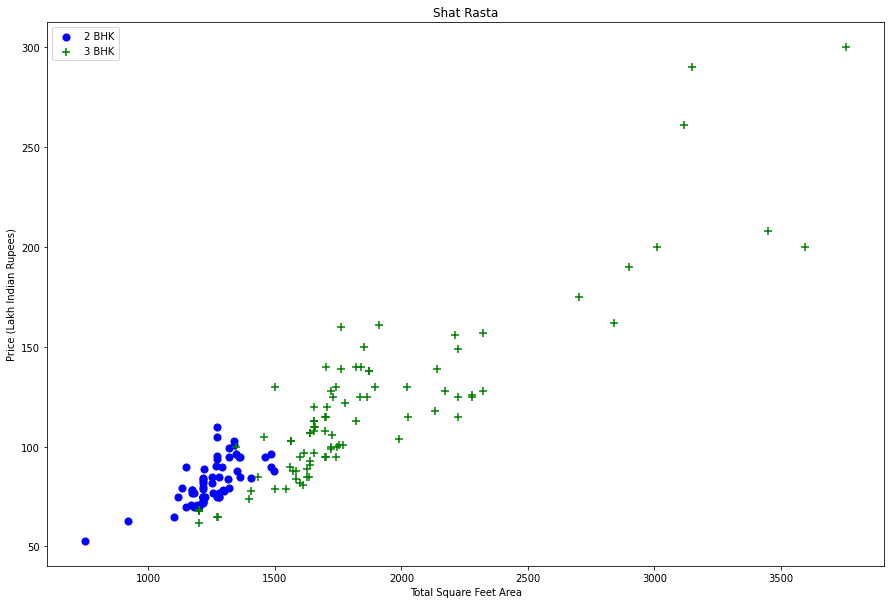

In [102]:
plot_scatter_chart(df,"Shat Rasta")

Text(0, 0.5, 'Count')

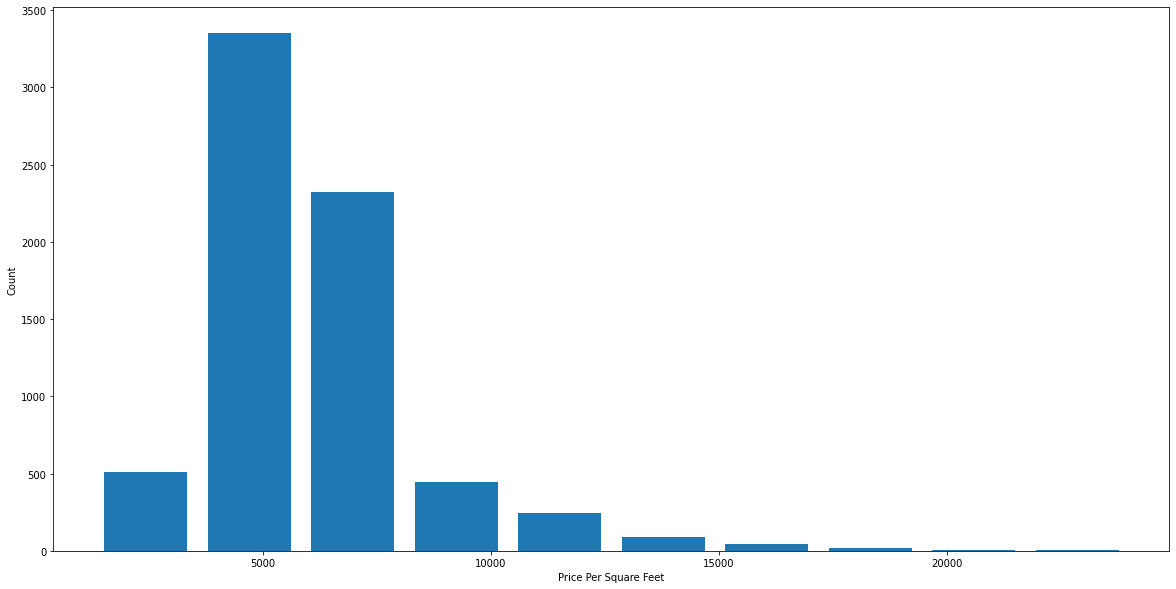

In [103]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [104]:
df.bath.unique()

array([ 4.,  2.,  3.,  8.,  5.,  1.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

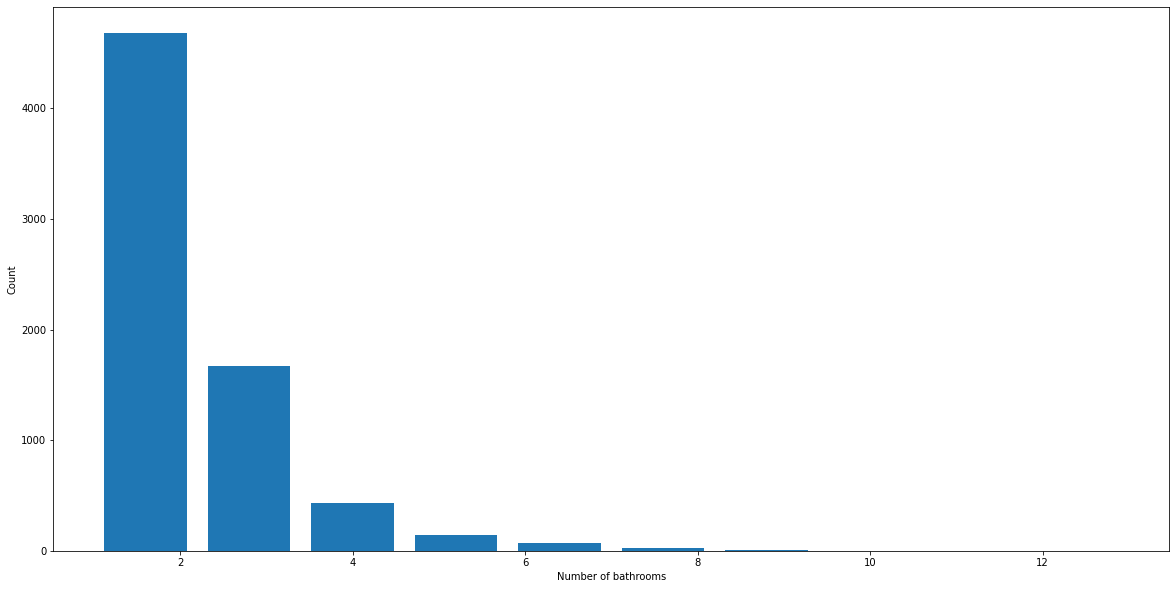

In [105]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [106]:
df[df.bath>10]

,location,total_sqft,bath,balcony,price,Bhk,price_per_sqft
7752,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [107]:
df[df.bath>df.Bhk+2]

,location,total_sqft,bath,balcony,price,Bhk,price_per_sqft
1402,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6808,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
7649,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [108]:
df.shape

(7025, 7)

In [109]:
df = df[df.bath<df.Bhk+2]
df.shape

(6958, 7)

In [110]:
df = df.drop(['price_per_sqft'],axis='columns')

In [111]:
df.head()

,location,total_sqft,bath,balcony,price,Bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4
2,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
4,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3


In [112]:
dummies = pd.get_dummies(df.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,...,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shat Rasta,Shivaji Nagar,Shukrabad,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subahanbag,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,location,total_sqft,bath,balcony,price,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shat Rasta,Shivaji Nagar,Shukrabad,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subahanbag,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
df = df.drop('location',axis='columns')
df.head(2)

,total_sqft,bath,balcony,price,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shat Rasta,Shivaji Nagar,Shukrabad,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subahanbag,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2750.0,4.0,0.0,413.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
df.shape

(6958, 242)

In [116]:
X = df.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shat Rasta,Shivaji Nagar,Shukrabad,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subahanbag,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2750.0,4.0,0.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2450.0,4.0,2.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
X.shape

(6958, 241)

In [118]:
y = df.price
y.head(3)

0    428.0
1    413.0
2    368.0
Name: price, dtype: float64

In [119]:
len(y)

6958

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [121]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8522340602936118

In [122]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.7827518 , 0.86239394, 0.89125634, 0.78561666, 0.85436262])

In [123]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.835276,{'normalize': False}
1,lasso,0.672025,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.721832,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [124]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'Bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=241)

In [125]:
np.where(X.columns=='Shat Rasta')[0][0]

209

In [126]:
def predict_price(location,sqft,bath,Bhk):    
    loc_index = np.where(X.columns==location)[0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = Bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [127]:
tk = round(predict_price('Shat Rasta',1000, 2, 2))

print(tk,"Tk")

56 Tk


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [128]:
tk = round(predict_price('Shat Rasta',1000, 3, 3))

print(tk,"Tk")

57 Tk


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [129]:
import pickle
with open('dhaka_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [130]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))